In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

## Import and pre-process the Data

In [2]:
df = pd.read_csv('./Data/onlinefraud.csv')

df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df.head()

df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Split the dataset into features (X) and target variable (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into test, train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Display Confusion Matrix
def display_confusion_matrix(confusion_matrix):
    labels = ['Not Fraud', 'Fraud']
    confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)

    confusion_matrix_display.plot()

    plt.title('Random Forest Confusion Matrix:')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.figure(figsize=(5,5))

    plt.show()

## Random Forests

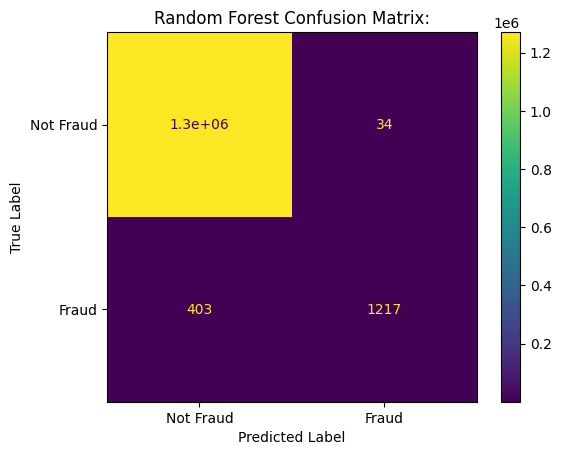

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9996565880093421
Random Forest Precision: 0.9728217426059153
Random Forest Recall: 0.7512345679012346
Random Forest F1-Score: 0.8477882270985719


In [4]:
# Random forest with 2 estimators
rf_model = RandomForestClassifier(n_estimators=2, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)

display_confusion_matrix(rf_confusion_matrix)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-Score:", rf_f1_score)

In [5]:
# Calculate Various Random Forests
estimators_list = [1,5,10,20,40,60,80,100]
#estimators_list = [1,2]

rf_confusion_matrix = []
rf_accuracy = []
rf_precision = []
rf_recall = []
rf_f1_score = []

for i, estimator in enumerate(estimators_list):
    rf_model = RandomForestClassifier(n_estimators=estimator, random_state=42)
    rf_model.fit(X_train, y_train)

    rf_predictions = rf_model.predict(X_test)

    rf_confusion_matrix.append(confusion_matrix(y_test, rf_predictions))
    rf_accuracy.append(accuracy_score(y_test, rf_predictions))
    rf_precision.append(precision_score(y_test, rf_predictions))
    rf_recall.append(recall_score(y_test, rf_predictions))
    rf_f1_score.append(f1_score(y_test, rf_predictions))


1 :


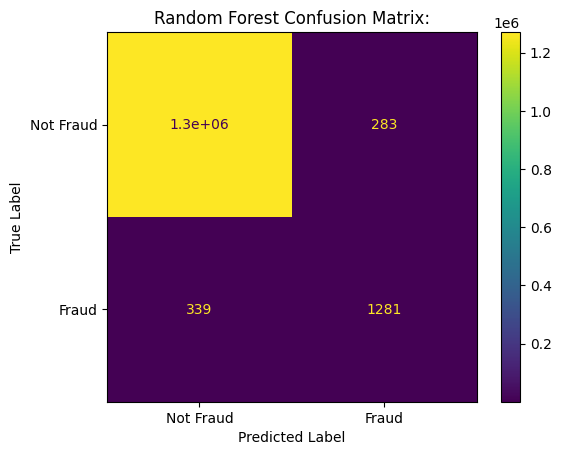

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9995112076471642
Random Forest Precision: 0.8190537084398977
Random Forest Recall: 0.7907407407407407
Random Forest F1-Score: 0.8046482412060301
5 :


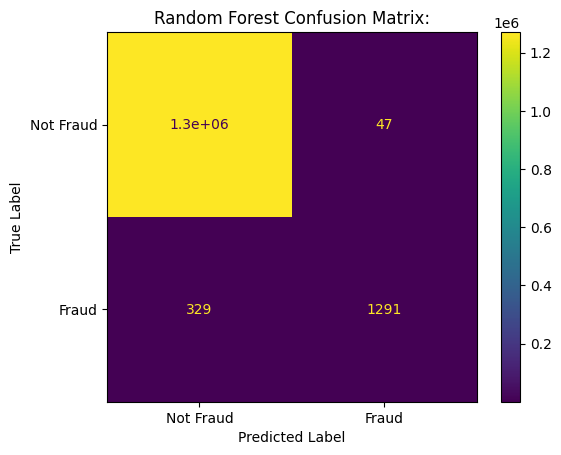

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.999704524236871
Random Forest Precision: 0.9648729446935725
Random Forest Recall: 0.7969135802469136
Random Forest F1-Score: 0.8728870858688303
10 :


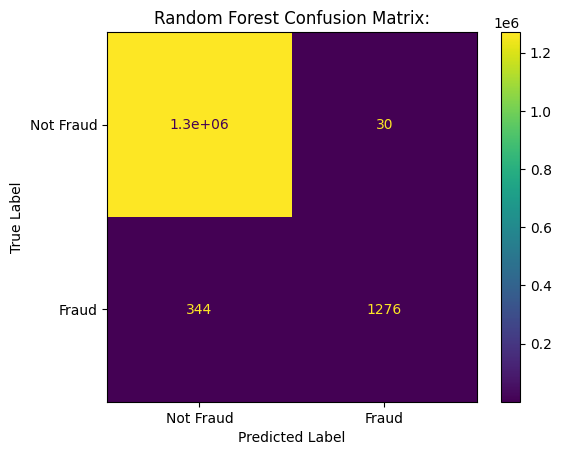

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997060959164621
Random Forest Precision: 0.9770290964777948
Random Forest Recall: 0.7876543209876543
Random Forest F1-Score: 0.8721804511278195
20 :


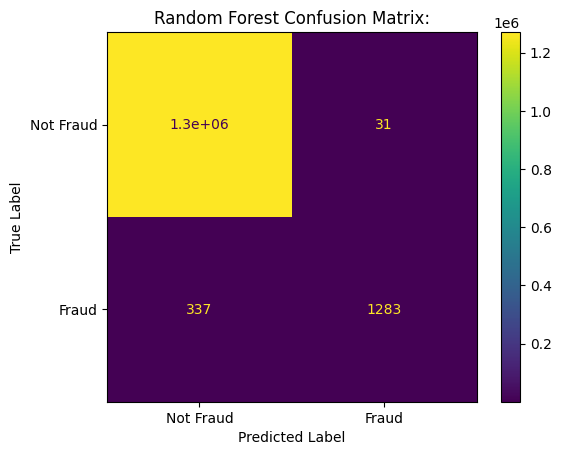

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997108109552354
Random Forest Precision: 0.9764079147640792
Random Forest Recall: 0.7919753086419753
Random Forest F1-Score: 0.874573960463531
40 :


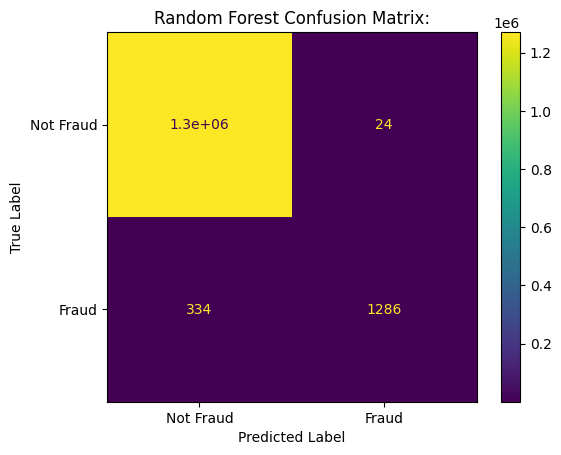

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.999718669353191
Random Forest Precision: 0.981679389312977
Random Forest Recall: 0.7938271604938272
Random Forest F1-Score: 0.8778156996587032
60 :


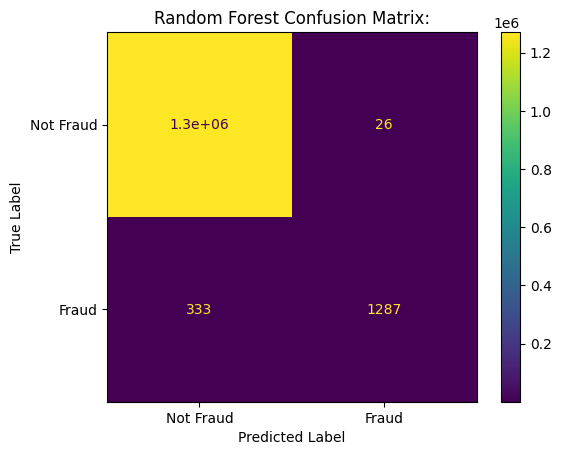

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997178835133954
Random Forest Precision: 0.9801980198019802
Random Forest Recall: 0.7944444444444444
Random Forest F1-Score: 0.877599727241732
80 :


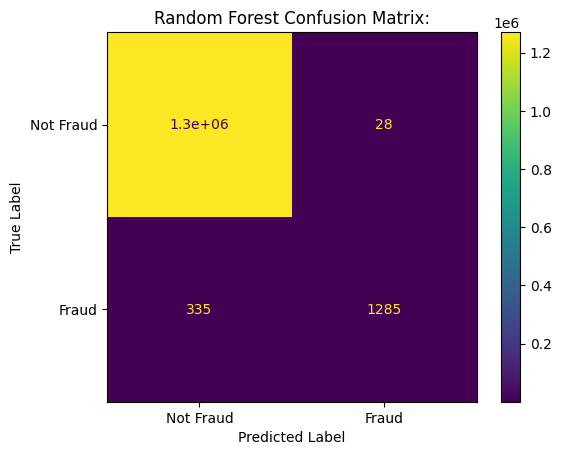

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997147401542132
Random Forest Precision: 0.9786747905559787
Random Forest Recall: 0.7932098765432098
Random Forest F1-Score: 0.876235935901807
100 :


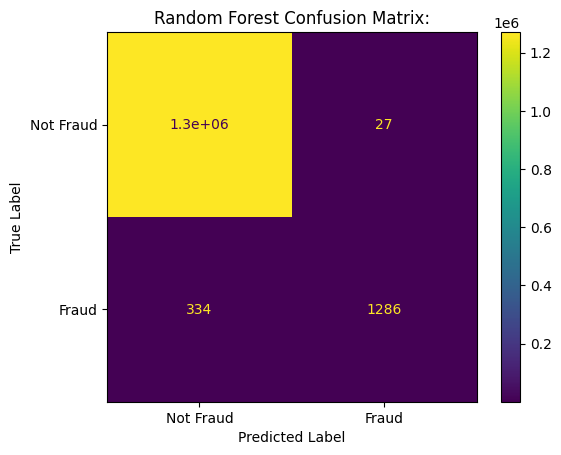

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997163118338043
Random Forest Precision: 0.9794364051789795
Random Forest Recall: 0.7938271604938272
Random Forest F1-Score: 0.8769178315717695


In [8]:
for i, estimator in enumerate(estimators_list):
    print(estimator,":")
    display_confusion_matrix(rf_confusion_matrix[i])
    print("Random Forest Accuracy:", rf_accuracy[i])
    print("Random Forest Precision:", rf_precision[i])
    print("Random Forest Recall:", rf_recall[i])
    print("Random Forest F1-Score:", rf_f1_score[i])
        

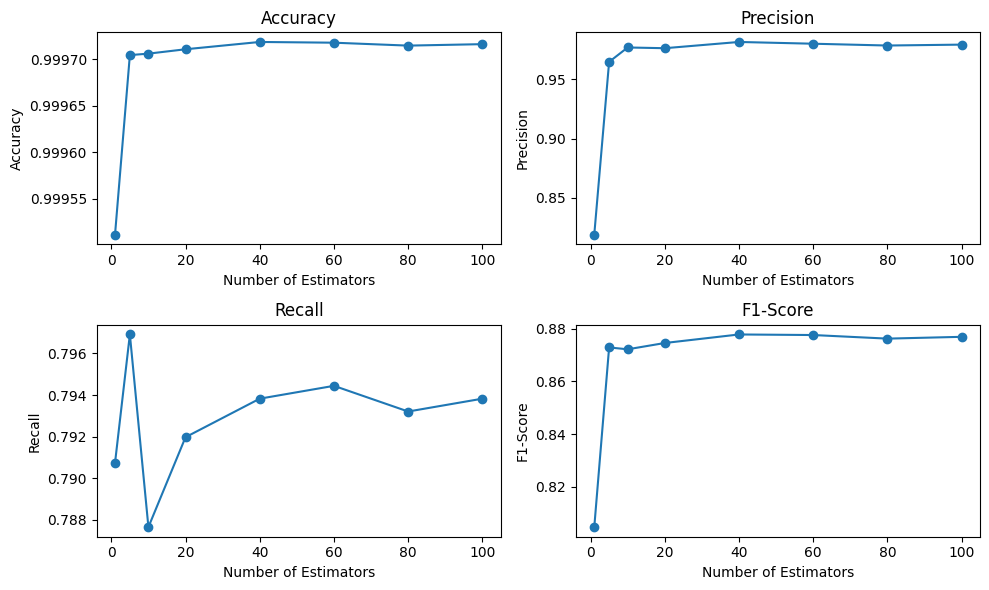

In [10]:
# Plot the metrics
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(estimators_list, rf_accuracy, marker='o')
plt.title('Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

# Plot precision
plt.subplot(2, 2, 2)
plt.plot(estimators_list, rf_precision, marker='o')
plt.title('Precision')
plt.xlabel('Number of Estimators')
plt.ylabel('Precision')

# Plot recall
plt.subplot(2, 2, 3)
plt.plot(estimators_list, rf_recall, marker='o')
plt.title('Recall')
plt.xlabel('Number of Estimators')
plt.ylabel('Recall')

# Plot F1-score
plt.subplot(2, 2, 4)
plt.plot(estimators_list, rf_f1_score, marker='o')
plt.title('F1-Score')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

## Scaled X

In [13]:
# Calculate Various Random Forests
estimators_list = [1,5,10,20,40,60,80,100]
#estimators_list = [1,2]

rf_confusion_matrix = []
rf_accuracy = []
rf_precision = []
rf_recall = []
rf_f1_score = []

for i, estimator in enumerate(estimators_list):
    rf_model = RandomForestClassifier(n_estimators=estimator, random_state=42)
    rf_model.fit(X_train_scaled, y_train)

    rf_predictions = rf_model.predict(X_test_scaled)

    rf_confusion_matrix.append(confusion_matrix(y_test, rf_predictions))
    rf_accuracy.append(accuracy_score(y_test, rf_predictions))
    rf_precision.append(precision_score(y_test, rf_predictions))
    rf_recall.append(recall_score(y_test, rf_predictions))
    rf_f1_score.append(f1_score(y_test, rf_predictions))


1 :


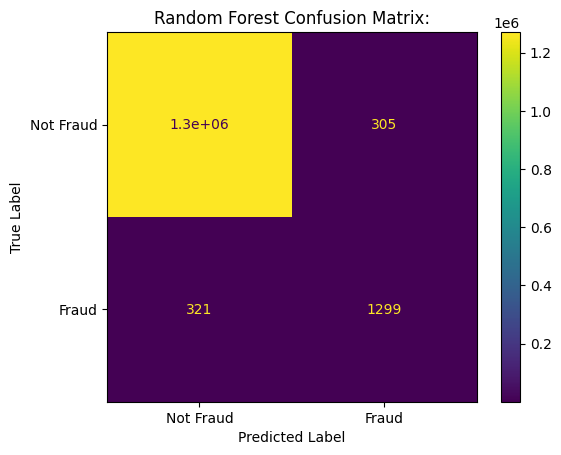

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.999508064287982
Random Forest Precision: 0.809850374064838
Random Forest Recall: 0.8018518518518518
Random Forest F1-Score: 0.8058312655086849
5 :


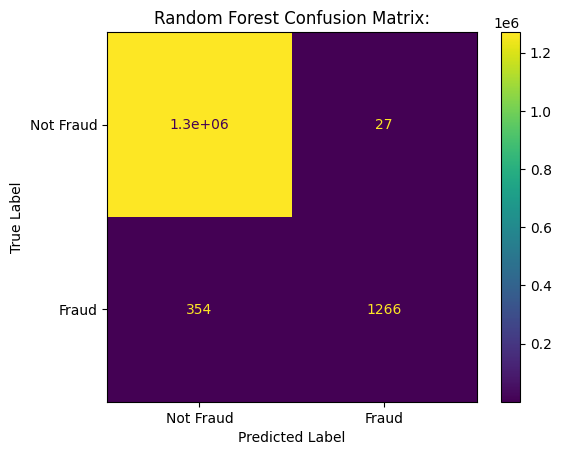

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997005950378932
Random Forest Precision: 0.9791183294663574
Random Forest Recall: 0.7814814814814814
Random Forest F1-Score: 0.8692070030895983
10 :


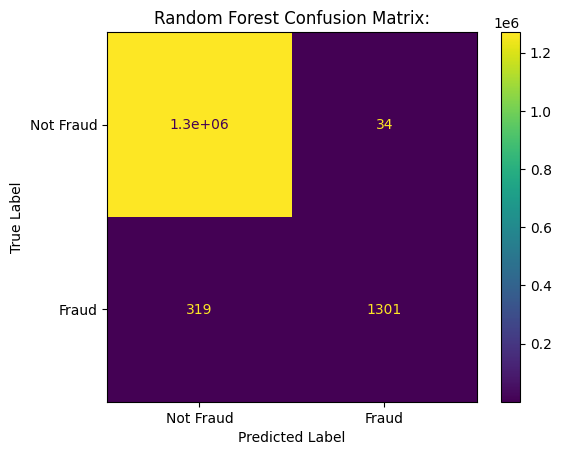

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997225985521687
Random Forest Precision: 0.9745318352059925
Random Forest Recall: 0.8030864197530864
Random Forest F1-Score: 0.8805414551607444
20 :


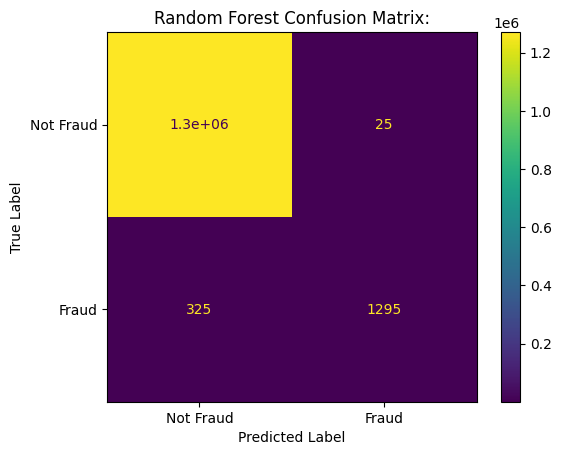

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997249560715554
Random Forest Precision: 0.9810606060606061
Random Forest Recall: 0.7993827160493827
Random Forest F1-Score: 0.8809523809523808
40 :


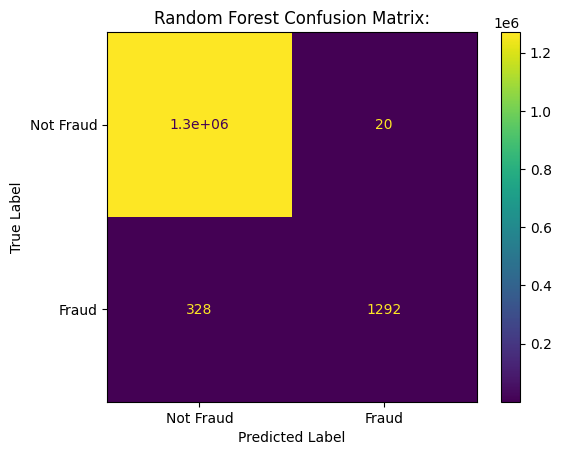

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997265277511466
Random Forest Precision: 0.9847560975609756
Random Forest Recall: 0.7975308641975308
Random Forest F1-Score: 0.8813096862210096
60 :


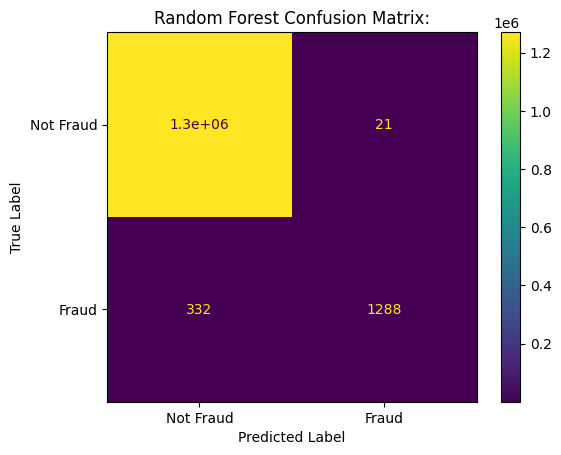

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997225985521687
Random Forest Precision: 0.983957219251337
Random Forest Recall: 0.7950617283950617
Random Forest F1-Score: 0.8794810515534313
80 :


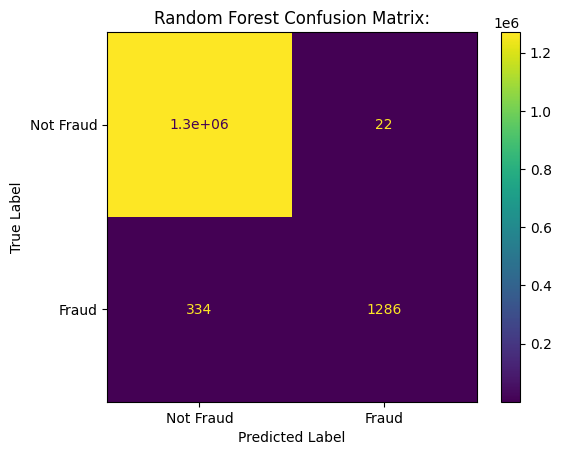

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997202410327821
Random Forest Precision: 0.9831804281345565
Random Forest Recall: 0.7938271604938272
Random Forest F1-Score: 0.8784153005464481
100 :


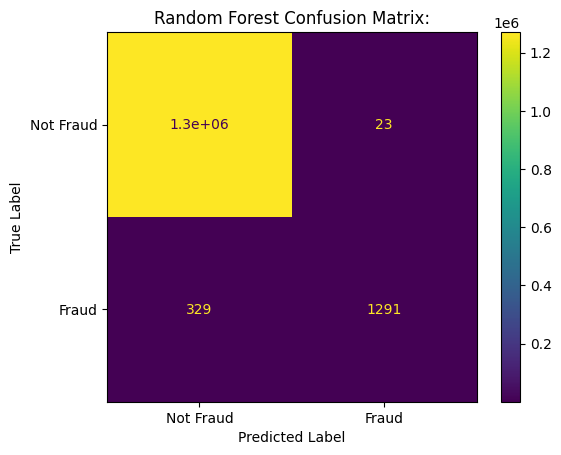

<Figure size 500x500 with 0 Axes>

Random Forest Accuracy: 0.9997233843919643
Random Forest Precision: 0.982496194824962
Random Forest Recall: 0.7969135802469136
Random Forest F1-Score: 0.880027266530334


In [14]:
for i, estimator in enumerate(estimators_list):
    print(estimator,":")
    display_confusion_matrix(rf_confusion_matrix[i])
    print("Random Forest Accuracy:", rf_accuracy[i])
    print("Random Forest Precision:", rf_precision[i])
    print("Random Forest Recall:", rf_recall[i])
    print("Random Forest F1-Score:", rf_f1_score[i])

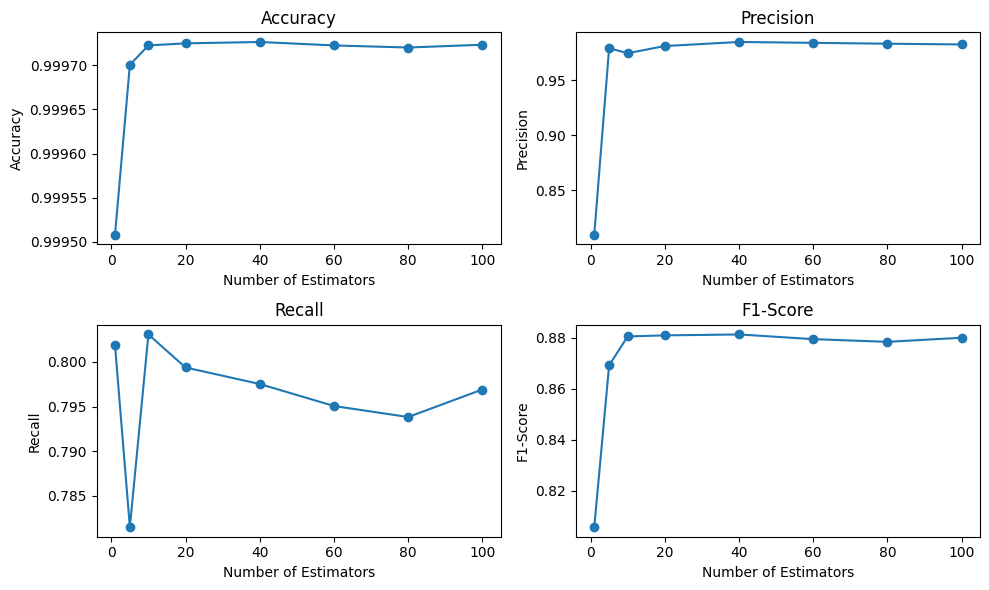

In [15]:
# Plot the metrics
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(estimators_list, rf_accuracy, marker='o')
plt.title('Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

# Plot precision
plt.subplot(2, 2, 2)
plt.plot(estimators_list, rf_precision, marker='o')
plt.title('Precision')
plt.xlabel('Number of Estimators')
plt.ylabel('Precision')

# Plot recall
plt.subplot(2, 2, 3)
plt.plot(estimators_list, rf_recall, marker='o')
plt.title('Recall')
plt.xlabel('Number of Estimators')
plt.ylabel('Recall')

# Plot F1-score
plt.subplot(2, 2, 4)
plt.plot(estimators_list, rf_f1_score, marker='o')
plt.title('F1-Score')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()